In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_excel("Data_Train.xlsx")
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


price column is our target variable and it is a regressor problem, we have dates we need to do feature engineering on that and times too.

object datatypes needs to be encoded null values needs to be imputed

In [77]:
df_test=pd.read_excel("Test_set.xlsx")
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


test dataset doesnt have the price column i.e. our target variable rest is same

# EDA and Feature Engineering of train and test dataset

In [4]:
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

all columns are object datatypes except our target variable

In [5]:
df_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

all columns are object datatypes

In [6]:
df_train.shape

(10683, 11)

train dataset shape is 10683 rows and 11 columns

In [7]:
df_test.shape

(2671, 10)

test dataset shape is 2671 rows and 10 columns

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


route and total-stops have null values

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


no null values present

In [10]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

null values in route and total_stops

In [11]:
df_train['Route'].mode()

0    DEL → BOM → COK
dtype: object

In [12]:
df_train['Total_Stops'].mode()

0    1 stop
dtype: object

In [13]:
df_train['Route'].fillna('DEL → BOM → COK',inplace=True)

replaced null values with the mode

In [14]:
df_train['Total_Stops'].fillna('1 stop',inplace=True)

replaced null values with the mode

In [15]:
a=df_train.describe(include=['O']).columns

saved all the object dataype columns in a variable

In [16]:
for i in a:
    print(i)
    print(df_train[i].value_counts())
    print('\n')

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019

will convert date of journey, dep time and arrival time into new columns for better ml

In [17]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

now no null values are present

In [18]:
df_train['Journey_day']=df_train['Date_of_Journey'].str.split('/').str[0].astype(int)
df_train['Journey_month']=df_train['Date_of_Journey'].str.split('/').str[1].astype(int)
df_train.drop('Date_of_Journey',axis=1,inplace=True)

df_train['departure_hour']=pd.to_datetime(df_train['Dep_Time']).dt.hour
df_train['departure_minute']=pd.to_datetime(df_train['Dep_Time']).dt.minute
df_train.drop('Dep_Time',axis=1,inplace=True)

df_train['Arrival_hour']=pd.to_datetime(df_train['Arrival_Time']).dt.hour
df_train['Arrival_minute']=pd.to_datetime(df_train['Arrival_Time']).dt.minute
df_train.drop('Arrival_Time',axis=1,inplace=True)


converted date of journey colums into day and month column

converted dep_time colum into hour and minute

converted arrival_time column into dep hour and dep minute column


In [19]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,departure_hour,departure_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [78]:
df_test['Journey_day']=df_test['Date_of_Journey'].str.split('/').str[0].astype(int)
df_test['Journey_month']=df_test['Date_of_Journey'].str.split('/').str[1].astype(int)
df_test.drop('Date_of_Journey',axis=1,inplace=True)

df_test['departure_hour']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['departure_minute']=pd.to_datetime(df_test['Dep_Time']).dt.minute
df_test.drop('Dep_Time',axis=1,inplace=True)

df_test['Arrival_hour']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_minute']=pd.to_datetime(df_test['Arrival_Time']).dt.minute
df_test.drop('Arrival_Time',axis=1,inplace=True)


for test dataset
converted date of journey colums into day and month column

converted dep_time colum into hour and minute

converted arrival_time column into dep hour and dep minute column

In [21]:
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,departure_hour,departure_minute,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [22]:
df_test.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Duration            0
Total_Stops         0
Additional_Info     0
Journey_day         0
Journey_month       0
departure_hour      0
departure_minute    0
Arrival_hour        0
Arrival_minute      0
dtype: int64

no null values in test dataset

In [23]:
df_train.skew()

Price               1.812552
Journey_day         0.118351
Journey_month      -0.387493
departure_hour      0.113073
departure_minute    0.167029
Arrival_hour       -0.369988
Arrival_minute      0.110945
dtype: float64

price is skewed but that is our target column so need not have to remove it, other columns are in range of -/+0.5

In [24]:
a=df_train.describe(include=['O']).columns

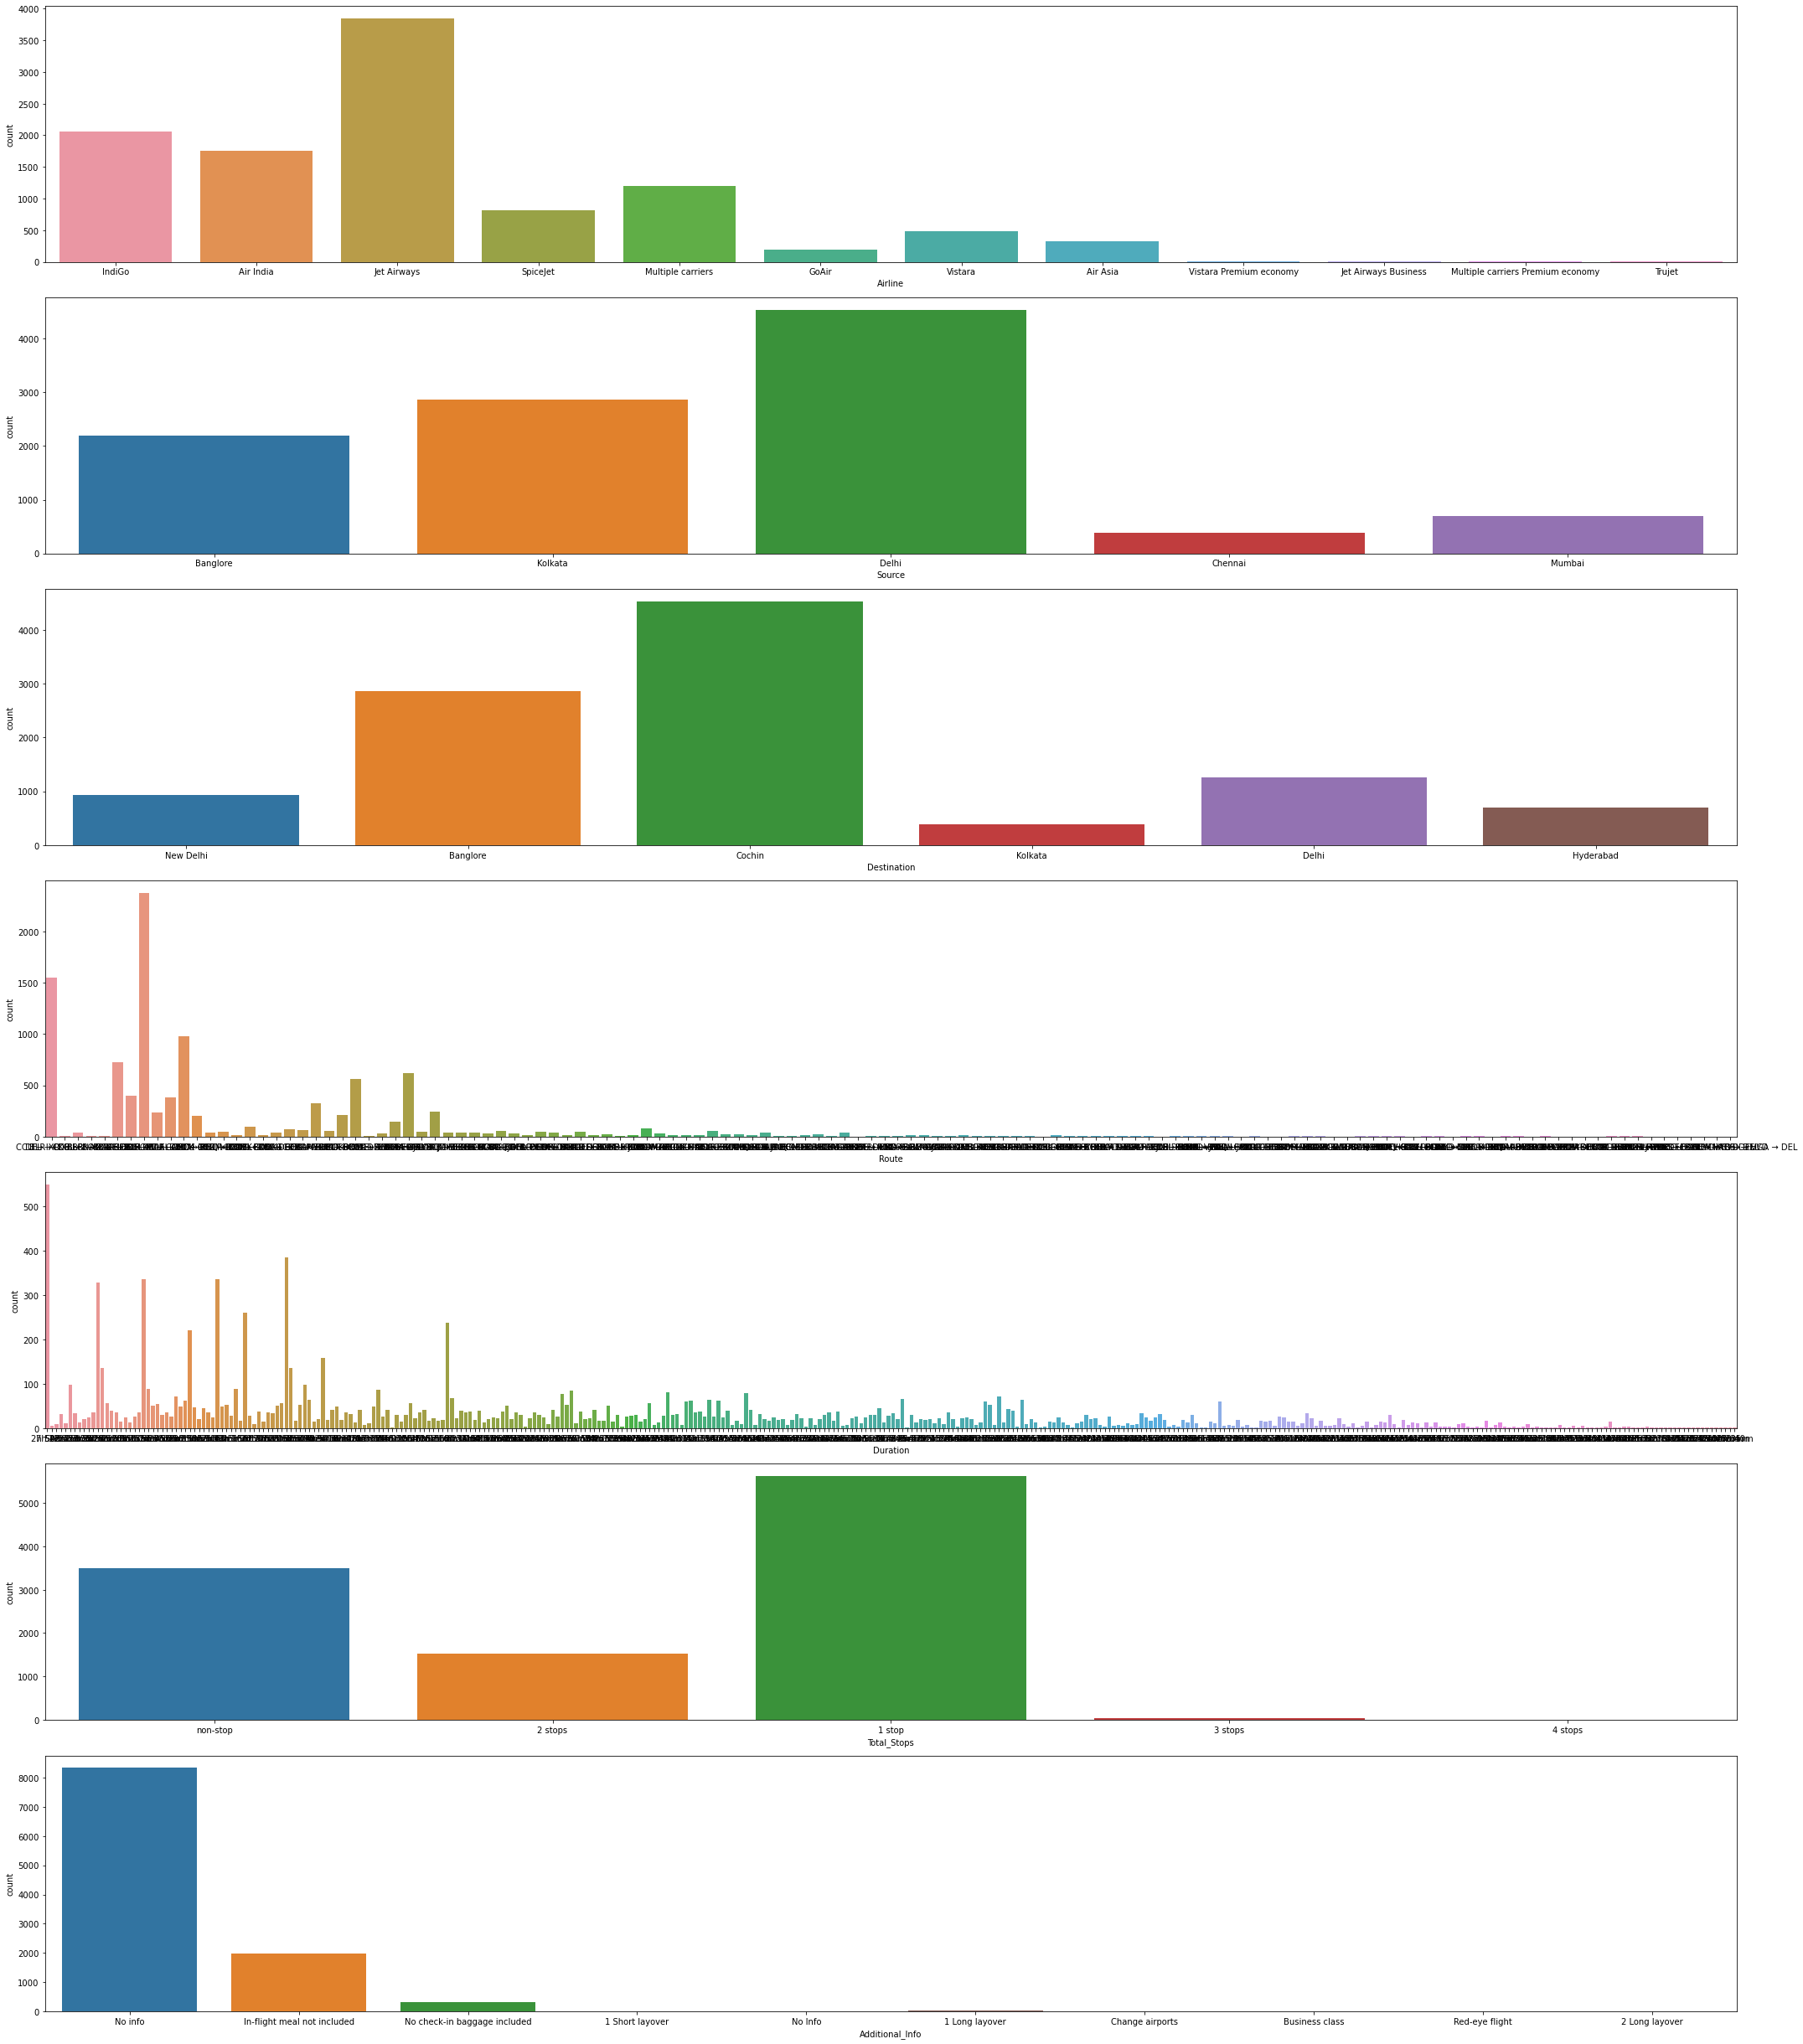

In [25]:
plt.figure(figsize=(30,34))
for i in range(len(a)):
    plt.subplot(7,1,i+1)
    sn.countplot(df_train[a[i]])
    plt.tight_layout()

jetairways airlines is the maximum

DEL → BOM → COK route is maximum

1 stop kind of totalstops are maximum

theres no info in additional info of maximum airline

maximum flights source is delhi

maximum flights destination is cochin

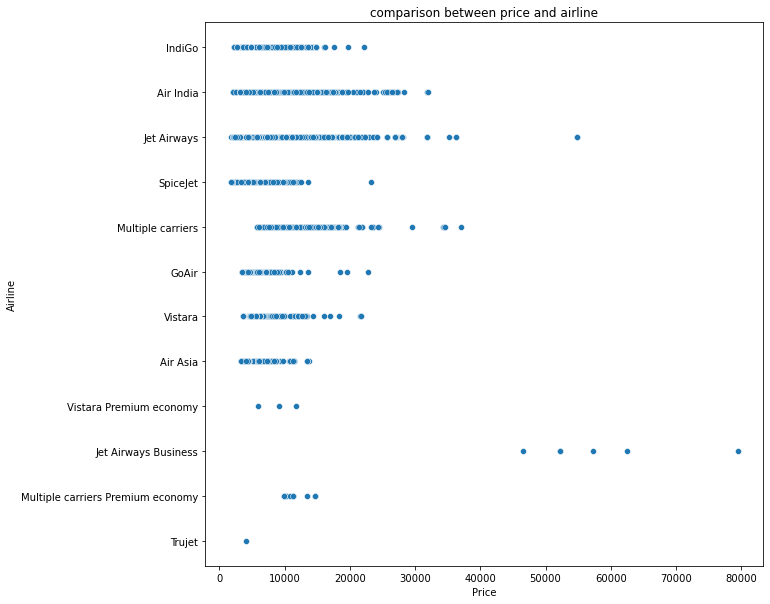

In [26]:
plt.figure(figsize=[10,10])
plt.title("comparison between price and airline")
sn.scatterplot(df_train['Price'],df_train['Airline']);

price of jetairways business is the highest

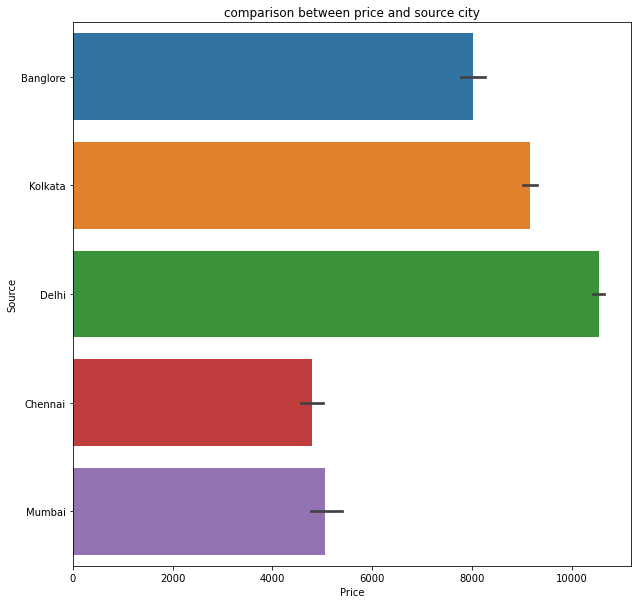

In [27]:
plt.figure(figsize=[10,10])
plt.title("comparison between price and source city")
sn.barplot(df_train['Price'],df_train['Source']);

delhi source flights are maximum in number

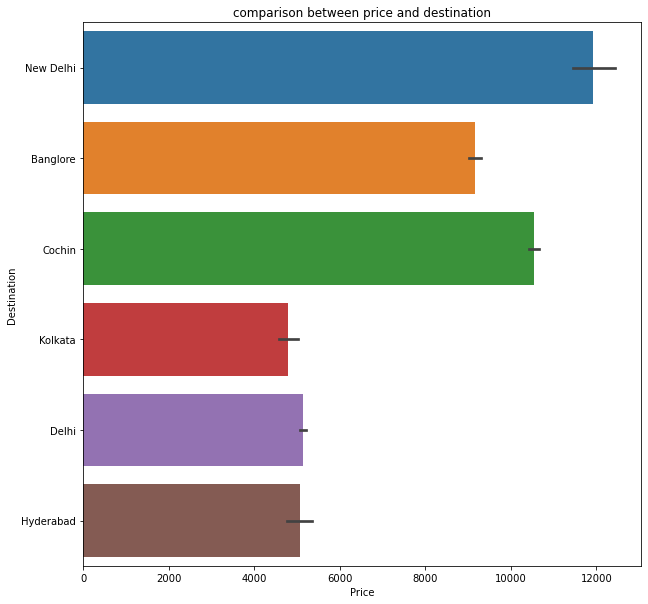

In [28]:
plt.figure(figsize=[10,10])
plt.title("comparison between price and destination")
sn.barplot(df_train['Price'],df_train['Destination']);

new delhi destination flights are maximum

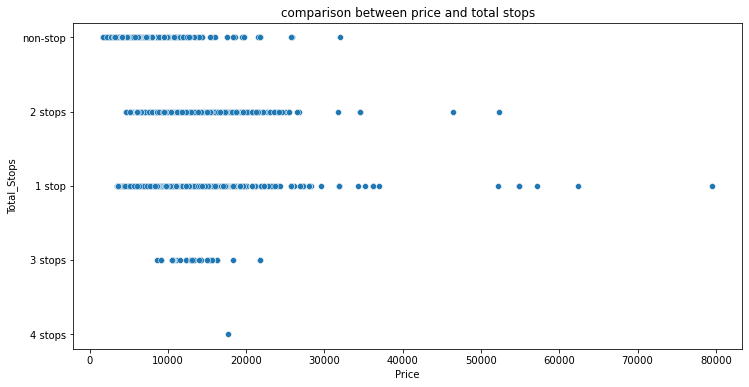

In [29]:
plt.figure(figsize=[12,6])
plt.title("comparison between price and total stops")
sn.scatterplot(df_train['Price'],df_train['Total_Stops']);

flights with 1stop have maximum price

# Encoding

In [30]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
oe = LabelEncoder()
for i in a:
    df_train[i]=oe.fit_transform(df_train[i].values.reshape(-1,1))
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,departure_hour,departure_minute,Arrival_hour,Arrival_minute
0,3,0,5,18,240,4,8,3897,24,3,22,20,1,10
1,1,3,0,84,336,1,8,7662,1,5,5,50,13,15
2,4,2,1,118,106,1,8,13882,9,6,9,25,4,25
3,3,3,0,91,311,0,8,6218,12,5,18,5,23,30
4,3,0,5,29,303,0,8,13302,1,3,16,50,21,35


encoded the object datatype columns

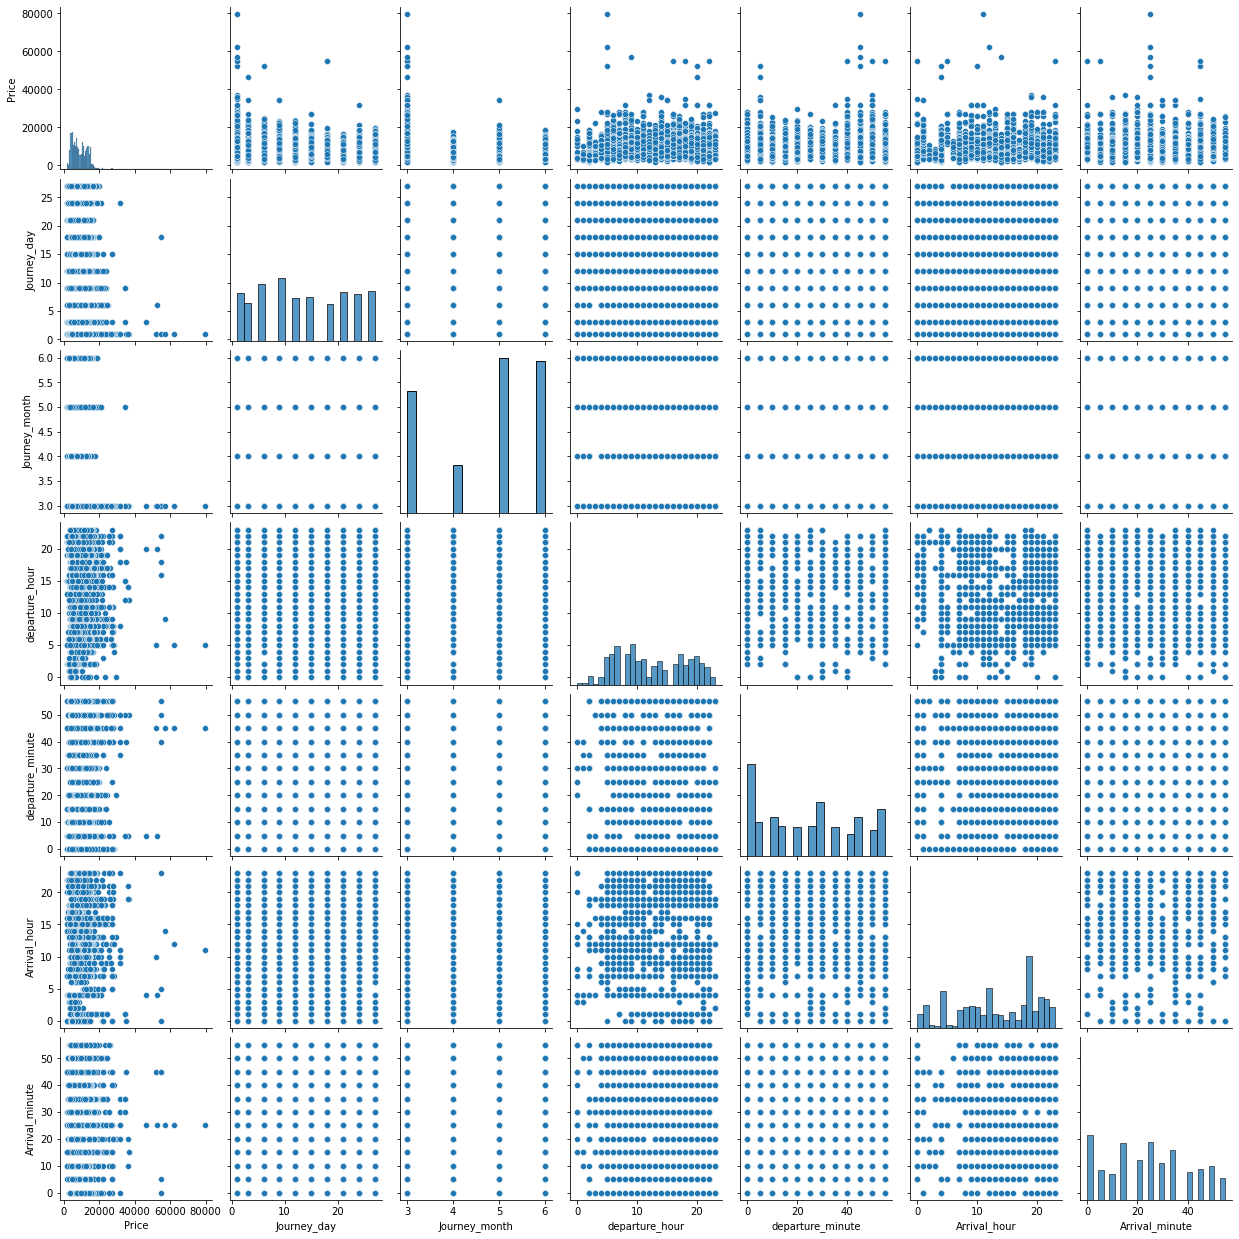

In [79]:
sn.pairplot(df_train)

arrival minute between 30-20 the prices are high

departure minute between 50-40 the prices are high

deparure hour at 5,prices are high

journey month 3 have high prices of flights

1st day of months have high prices



<AxesSubplot:>

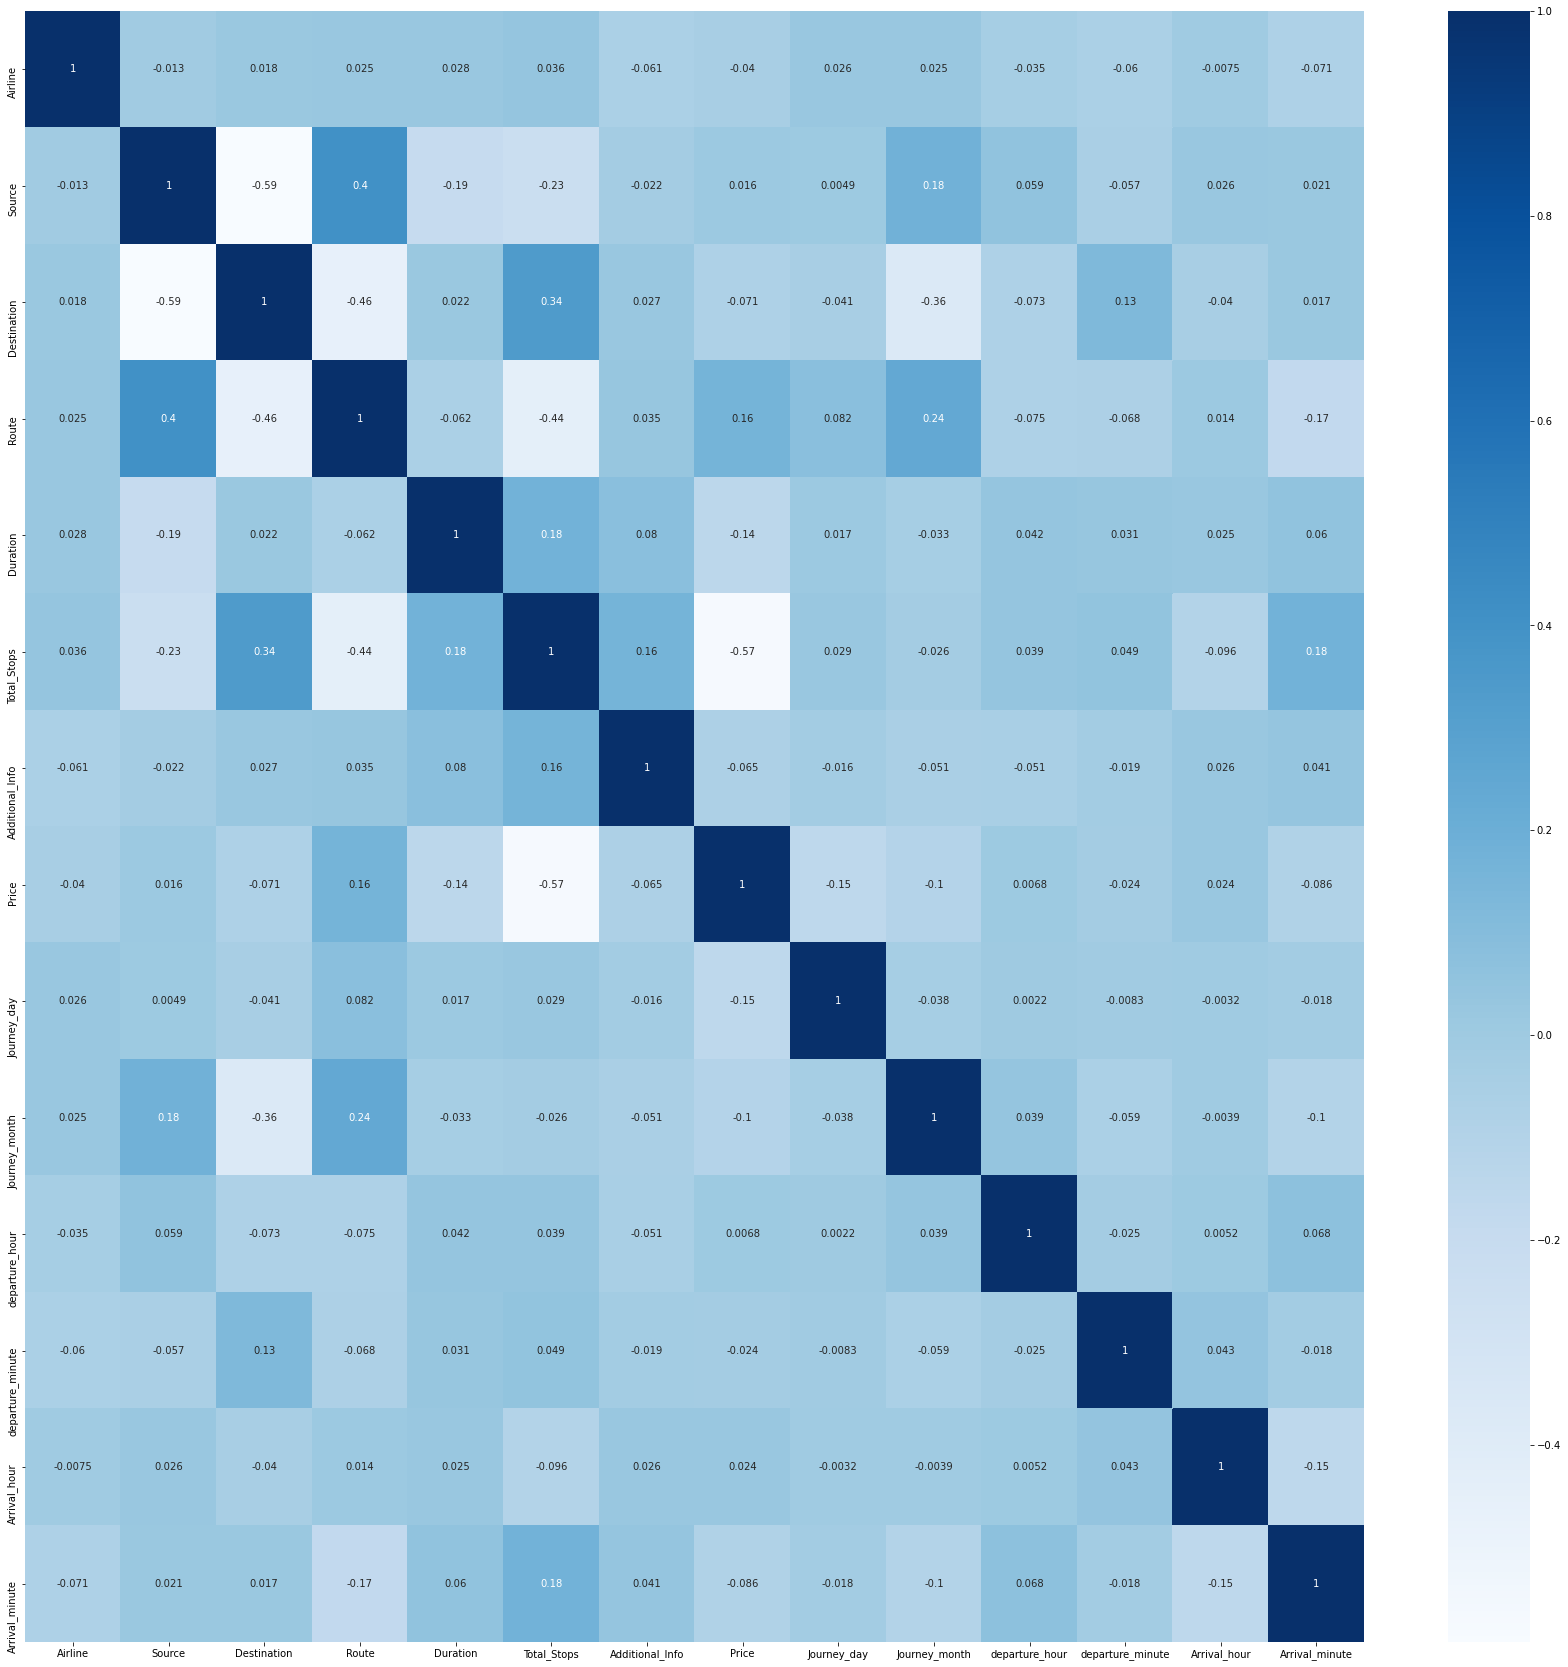

In [31]:
df_correlation=df_train.corr()
plt.figure(figsize=(30,30))
sn.heatmap(df_correlation,cmap='Blues',annot=True)

price column has least correlation with total stops and maximum correlation with route

Airline                AxesSubplot(0.125,0.816017;0.168478x0.0639831)
Source              AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
Destination         AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
Route               AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
Duration               AxesSubplot(0.125,0.739237;0.168478x0.0639831)
Total_Stops         AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
Additional_Info     AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
Price               AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
Journey_day            AxesSubplot(0.125,0.662458;0.168478x0.0639831)
Journey_month       AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
departure_hour      AxesSubplot(0.529348,0.662458;0.168478x0.0639831)
departure_minute    AxesSubplot(0.731522,0.662458;0.168478x0.0639831)
Arrival_hour           AxesSubplot(0.125,0.585678;0.168478x0.0639831)
Arrival_minute      AxesSubplot(0.327174,0.585678;0.168478x0.0639831)
dtype: object

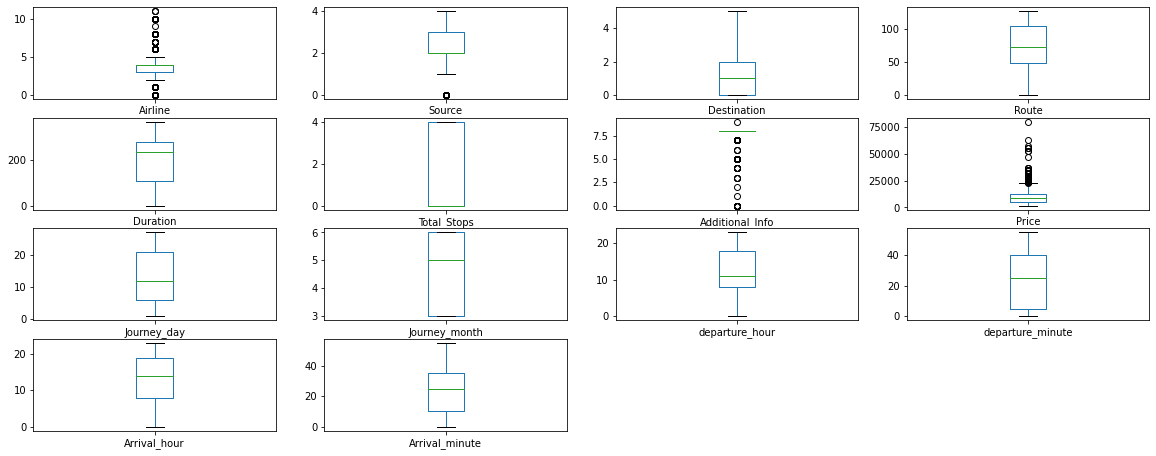

In [106]:
df_train.plot(kind='box',subplots=True,layout=(10,4),figsize=(20,20))

outliers present in airline, source, additional info, price

In [33]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_train))
threshold=3
np.where(z>3)

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
          826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
         1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
         2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
         2635,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
         3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,  4676,
         4829,  5013,  5013,  5136,  5372,  5372,  5439,  5628,  5662,
         5701,  5710,  5719,  5738,  5745,  5856,  5986,  6024,  6314,
         6336,  6407,  6576,  6576,  6588,  6605,  6991,  7351,  7356,
         7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,  7902,
         8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,
         8957,  8990,  9019,  9019,  9193,  9239,  9632,  9657,  9715,
         9974, 10052, 10113, 10160, 10182, 10189, 10353, 10364, 10364,
        10383, 10439, 10511, 10511], dtype=int64),
 array([7, 7, 7, 7, 7, 7, 

In [35]:
df_new=df_train[(z<3).all(axis=1)]
df_new.head()
df_new.shape

(10578, 14)

In [37]:
df_train.shape

(10683, 14)

In [38]:
Data_loss=((10683-10578)/10683)*100
Data_loss

0.9828699803426004

we can remove the outliers as the loss is less than 5%

In [41]:
x=df_new.drop('Price',axis=1)
y=df_new['Price']
print(x.shape)
print(y.shape)

(10578, 13)
(10578,)


splitting x and y variable

# Training and Testing of model

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [43]:
def chosen_model(model):
    maxAccu=0
    maxRS=0
    for i in range(1,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
        lm=model()
        lm.fit(x_train,y_train)
        pred=lm.predict(x_test)
        accu=r2_score(y_test,pred)
        if accu>maxAccu:
            maxAccu=accu
            maxRS=i
    print("best accuracy is",maxAccu,"on random state",maxRS)

In [45]:
chosen_model(RandomForestRegressor)

best accuracy is 0.9349500406878984 on random state 92


In [46]:
chosen_model(DecisionTreeRegressor)

best accuracy is 0.8959775419101141 on random state 73


In [47]:
chosen_model(AdaBoostRegressor)

best accuracy is 0.6775873585444224 on random state 95


In [48]:
chosen_model(GradientBoostingRegressor)

best accuracy is 0.8590019269392739 on random state 92


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=92)
from sklearn.model_selection import cross_val_score
score=cross_val_score(GradientBoostingRegressor(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.84581288 0.84093755 0.85031205 0.84501646 0.84675155 0.84836611
 0.84870245]
0.8465570079858894
0.0028415094079700283


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=92)
from sklearn.model_selection import cross_val_score
score=cross_val_score(RandomForestRegressor(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.93138471 0.9288574  0.93338791 0.93097512 0.93013965 0.92497639
 0.93593935]
0.9308086477768666
0.003198358423132397


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=95)
from sklearn.model_selection import cross_val_score
score=cross_val_score(AdaBoostRegressor(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.63517066 0.68327866 0.67659558 0.6641355  0.63474505 0.59328822
 0.62946135]
0.6452392889134931
0.02914652745737599


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=73)
from sklearn.model_selection import cross_val_score
score=cross_val_score(DecisionTreeRegressor(),x,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.87133856 0.88388652 0.90330364 0.8973495  0.88116568 0.87070715
 0.90053443]
0.886897925683565
0.012595348004474878


after seeing the model performance and the cross val score least difference between the two is in RandomforestRegressor. we will choose it as our model

# Hyperparameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [55]:
parameter={
         'max_features':['auto','sqrt','log2'],
          'min_samples_split':np.arange(0,10),
          'max_depth':np.arange(0,10),
          'min_samples_leaf':np.arange(0,10)}

In [56]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=10)

In [57]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [58]:
GCV.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [60]:
flight_mod=RandomForestRegressor(max_features='auto',max_depth=9,min_samples_leaf=1,min_samples_split=4)
flight_mod.fit(x_train,y_train)
pred=flight_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

90.07612575606177


after hyperparameter tuning this our scorre 90.07%

<AxesSubplot:ylabel='Price'>

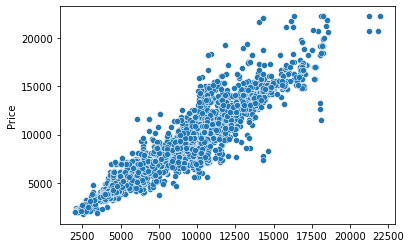

In [105]:
sn.scatterplot(pred,y_test)

we can see from the graph the model is good with predictions

In [61]:
import joblib
joblib.dump(flight_mod,"flightpricemodel.pkl")

['flightpricemodel.pkl']

saving the model

for test dataset i did most of the feature engineering and EDA above.

# EDA of test data

In [79]:
df_test

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,departure_hour,departure_minute,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,6,3,4,0,19,15


there are 2671 rows and 13 columns present in test dataset

In [80]:
df_test.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Journey_day', 'Journey_month', 'departure_hour',
       'departure_minute', 'Arrival_hour', 'Arrival_minute'],
      dtype='object')

columns for test dataset

In [81]:
df_test.skew()

Journey_day         0.199540
Journey_month      -0.403700
departure_hour      0.093759
departure_minute    0.128515
Arrival_hour       -0.443166
Arrival_minute      0.115267
dtype: float64

no skewness present

In [82]:
b=df_test.describe(include=['O']).columns

saving columns is b variable

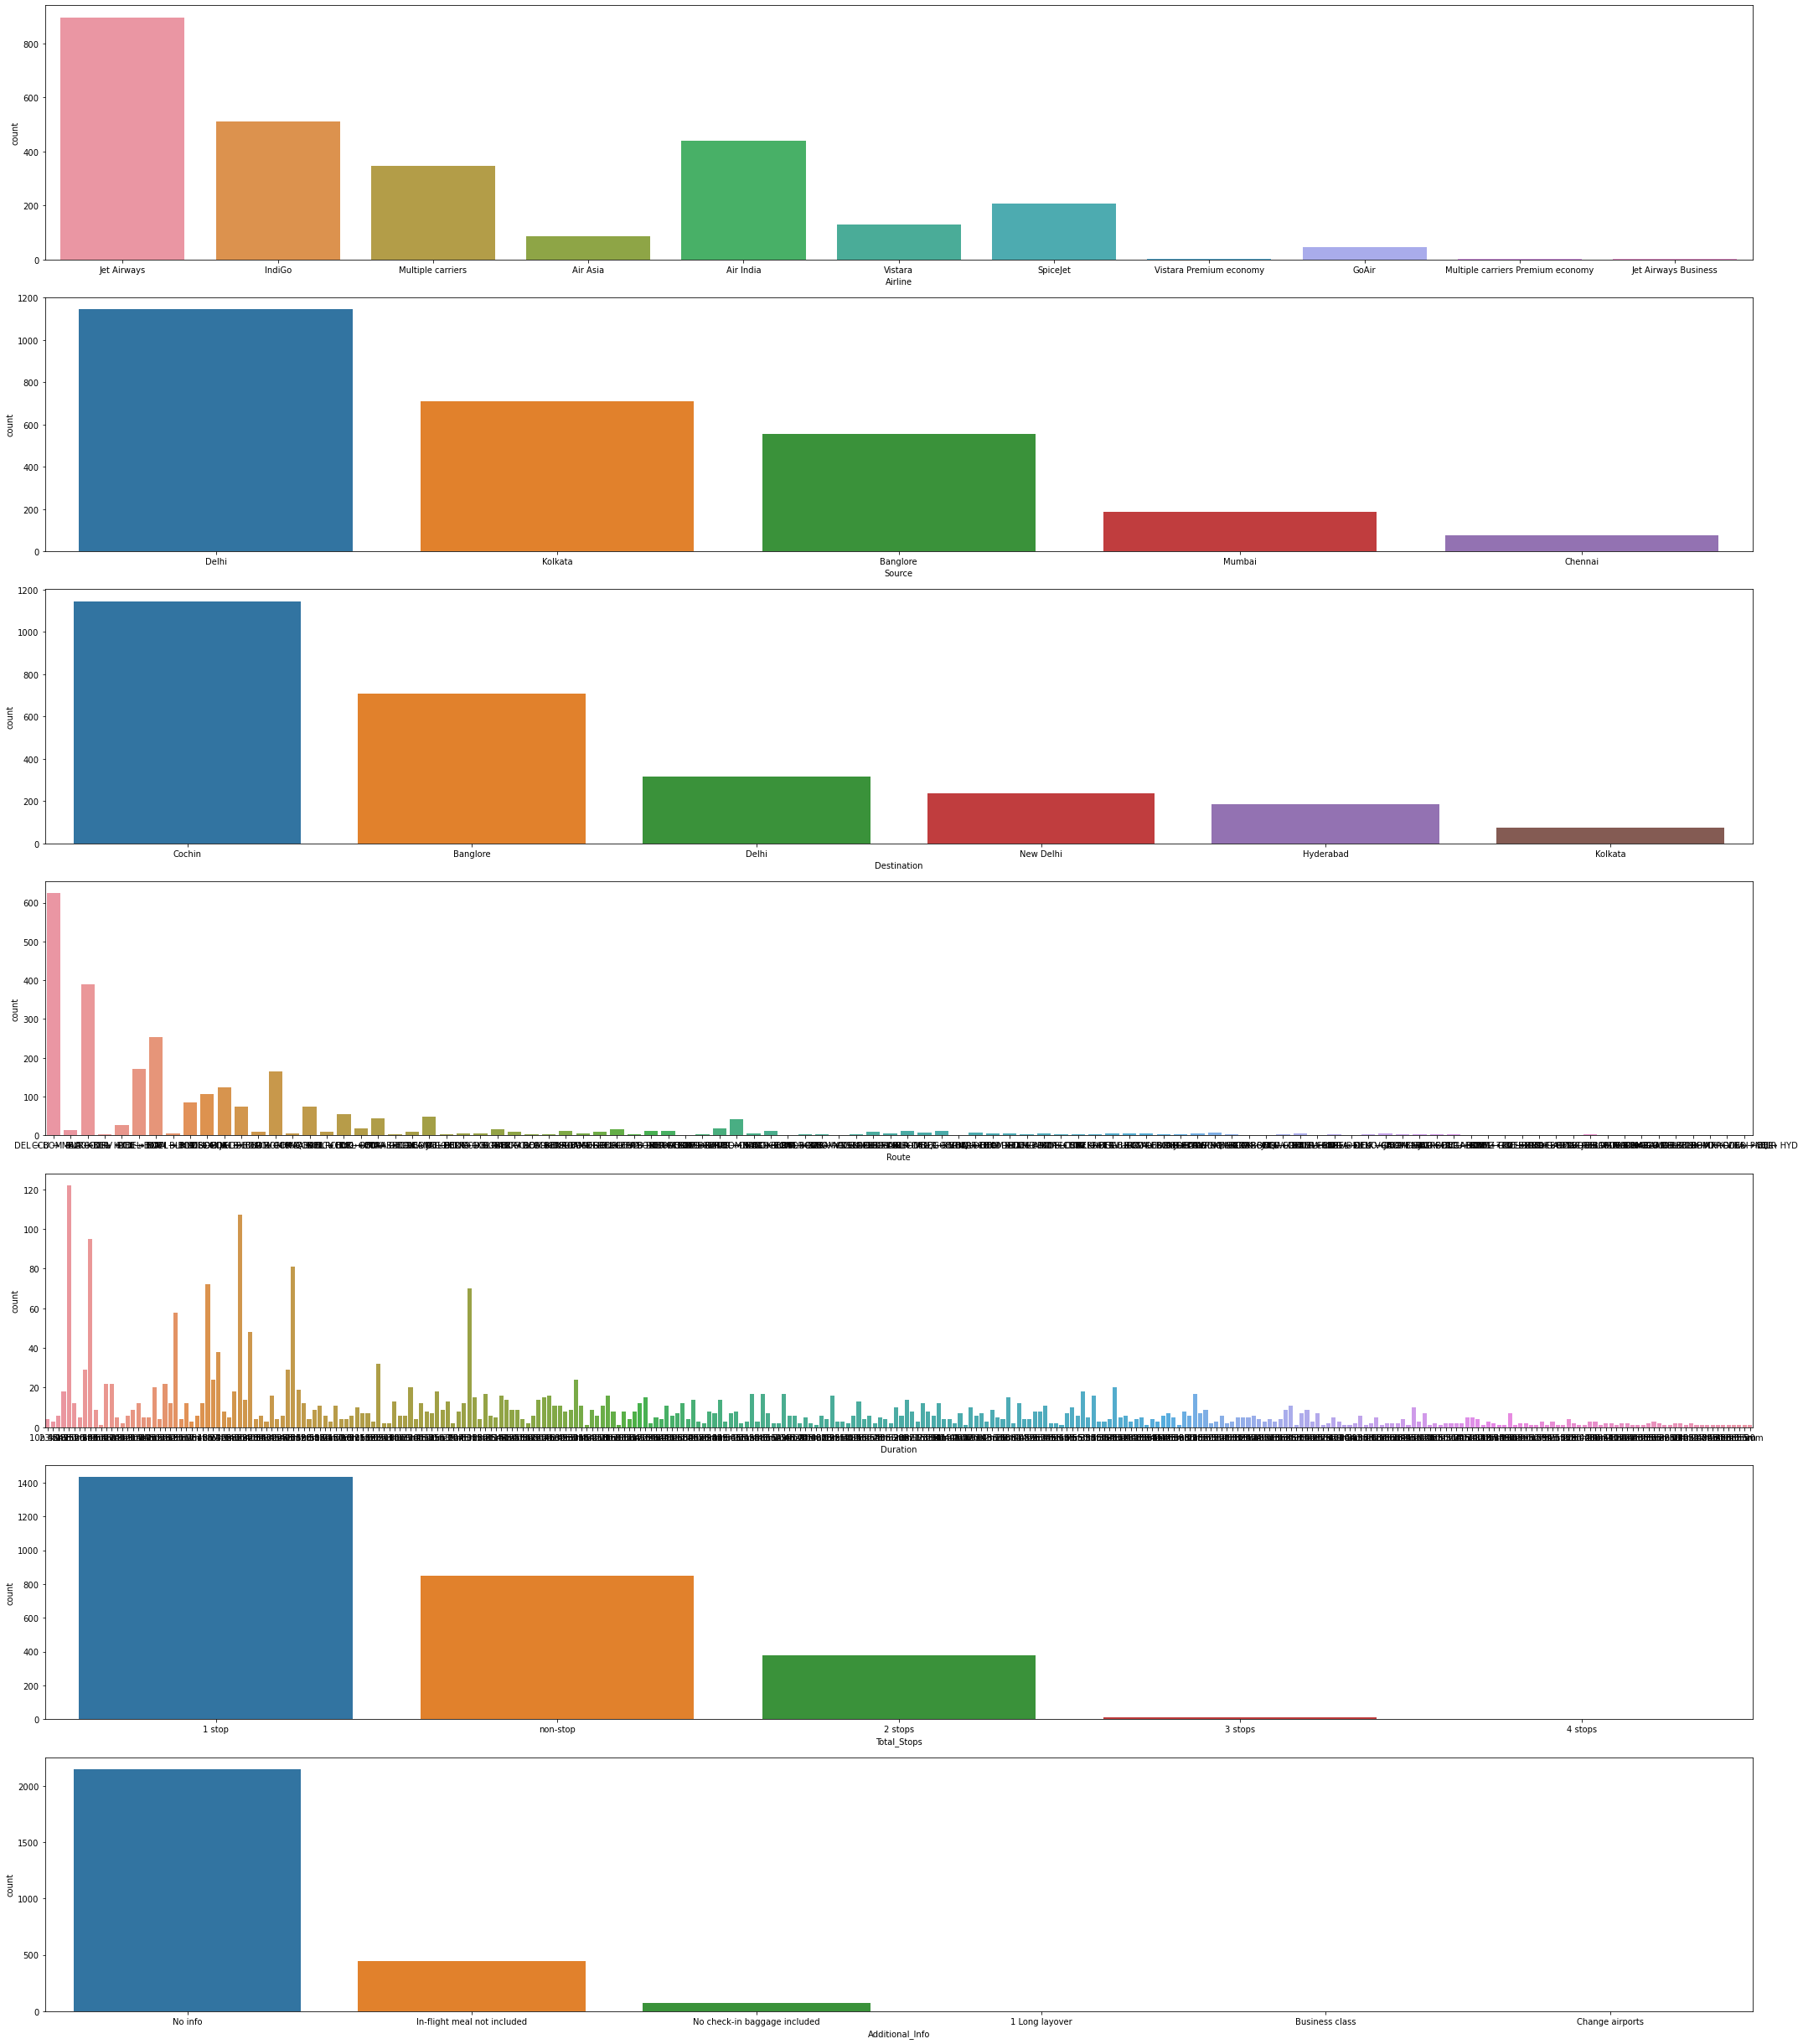

In [83]:
plt.figure(figsize=(30,34))
for i in range(len(b)):
    plt.subplot(7,1,i+1)
    sn.countplot(df_test[b[i]])
    plt.tight_layout()

jetairways airlines is the maximum

DEL → BOM → COK route is maximum

1 stop kind of totalstops are maximum

theres no info in additional info of maximum airline

maximum flights source is delhi

maximum flights destination is cochin

In [84]:
for i in b:
    print(i)
    print(df_test[i].value_counts())
    print('\n')

Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64


Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


Route
DEL → BOM → COK                      624
BLR → DEL                            389
CCU → BOM → BLR                      253
CCU → BLR                            172
BOM → HYD                            164
                         

did feature engineering of the columns above

shows the individual counts of each categorical column

In [85]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
oe = LabelEncoder()
for i in b:
    df_test[i]=oe.fit_transform(df_test[i].values.reshape(-1,1))
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,departure_hour,departure_minute,Arrival_hour,Arrival_minute
0,4,2,1,76,10,0,5,6,6,17,30,4,25
1,3,3,0,65,248,0,5,12,5,6,20,10,20
2,4,2,1,76,148,0,3,21,5,19,15,19,0
3,6,2,1,76,36,0,5,21,5,8,0,21,0
4,0,0,2,16,216,4,5,24,6,23,55,2,45


encoded the columns

<AxesSubplot:>

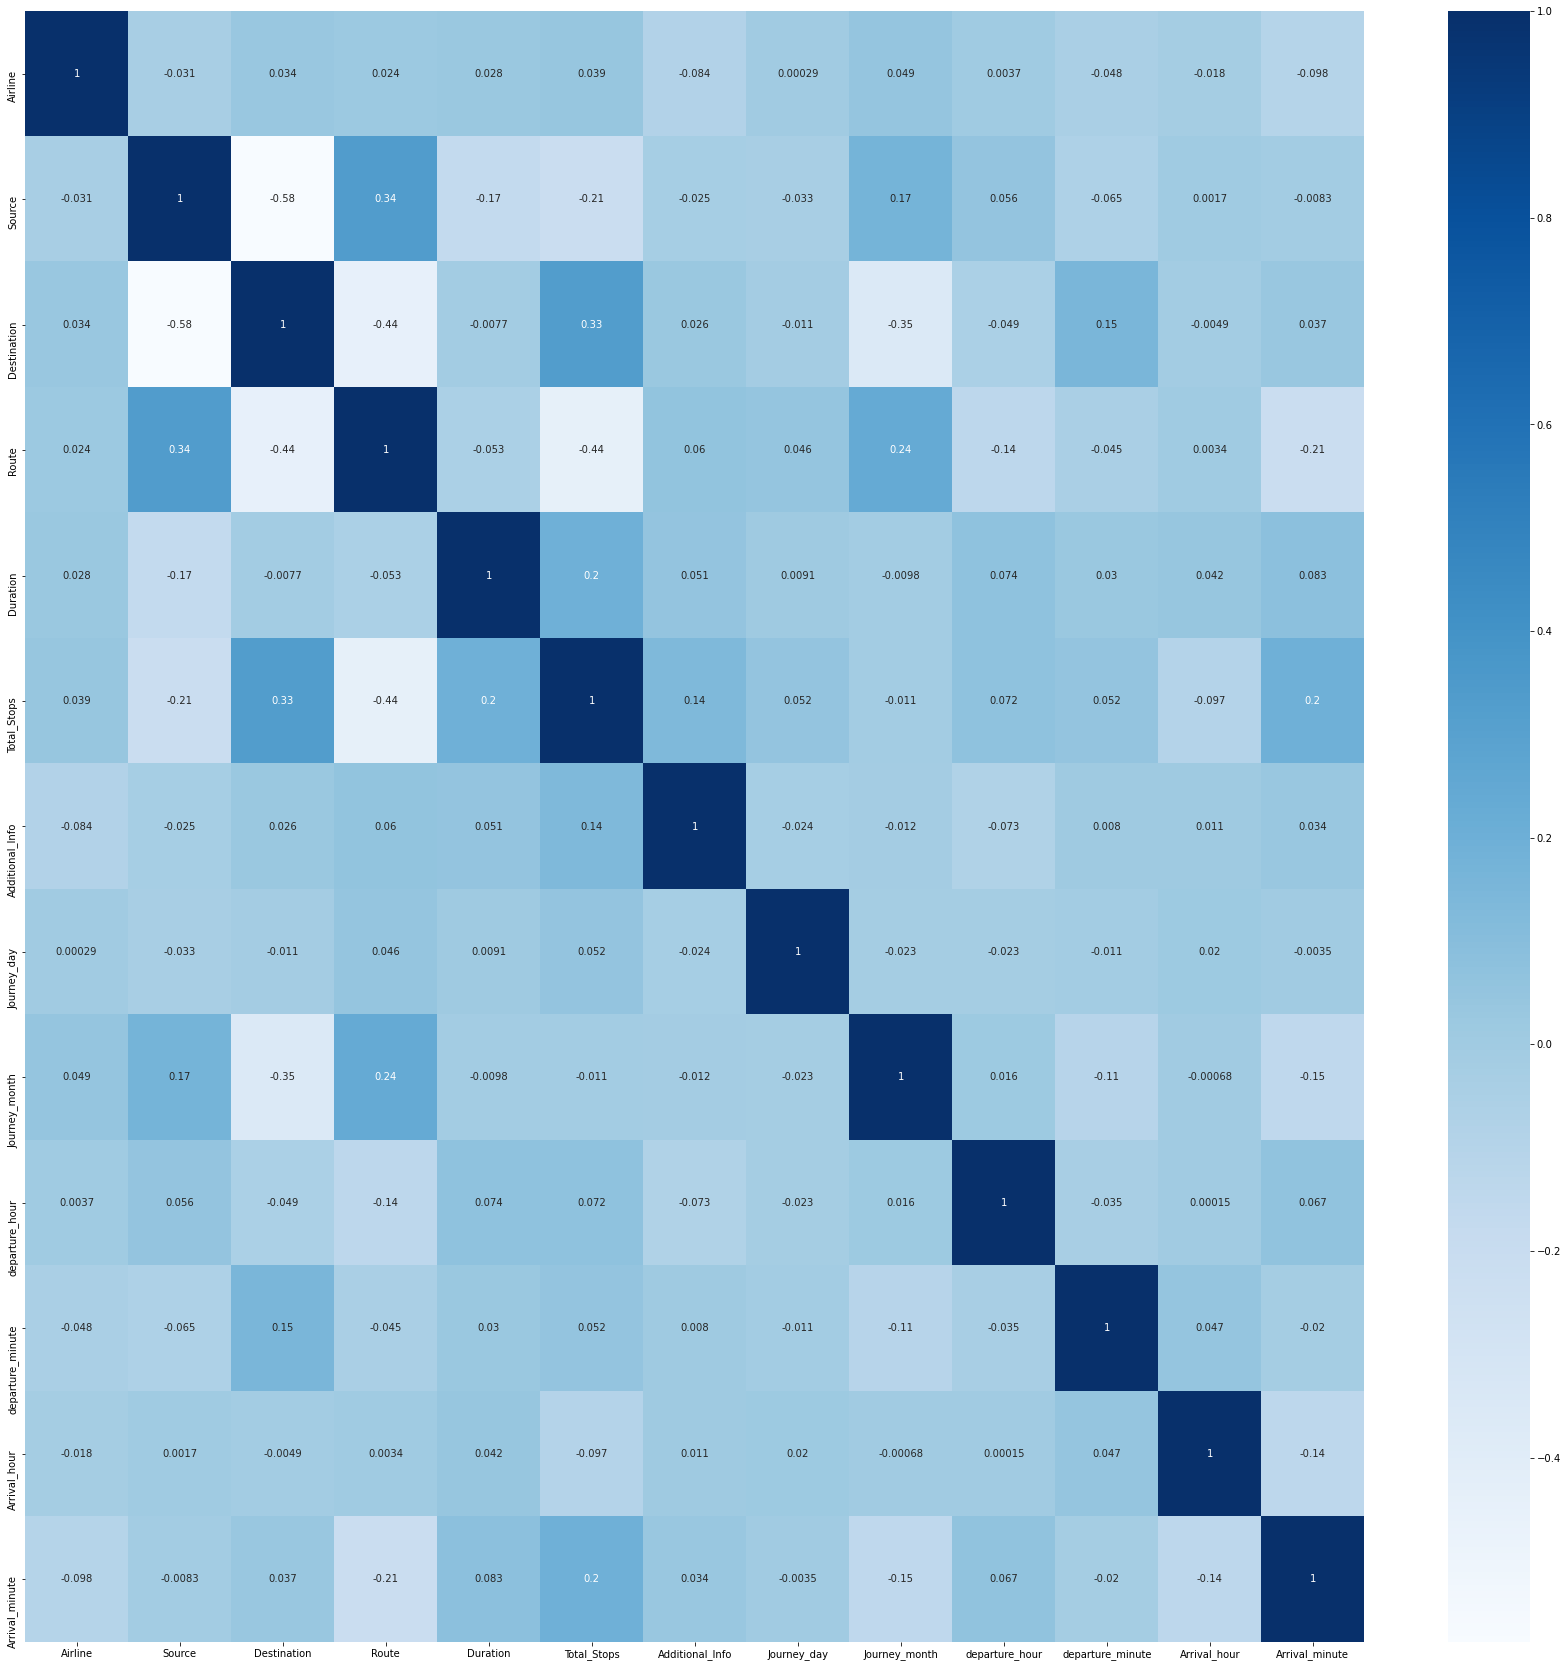

In [87]:
df_correlation=df_test.corr()
plt.figure(figsize=(30,30))
sn.heatmap(df_correlation,cmap='Blues',annot=True)

there is no sign of high collinearity

Airline             AxesSubplot(0.125,0.830974;0.775x0.049026)
Source              AxesSubplot(0.125,0.772143;0.775x0.049026)
Destination         AxesSubplot(0.125,0.713312;0.775x0.049026)
Route               AxesSubplot(0.125,0.654481;0.775x0.049026)
Duration            AxesSubplot(0.125,0.595649;0.775x0.049026)
Total_Stops         AxesSubplot(0.125,0.536818;0.775x0.049026)
Additional_Info     AxesSubplot(0.125,0.477987;0.775x0.049026)
Journey_day         AxesSubplot(0.125,0.419156;0.775x0.049026)
Journey_month       AxesSubplot(0.125,0.360325;0.775x0.049026)
departure_hour      AxesSubplot(0.125,0.301494;0.775x0.049026)
departure_minute    AxesSubplot(0.125,0.242662;0.775x0.049026)
Arrival_hour        AxesSubplot(0.125,0.183831;0.775x0.049026)
Arrival_minute         AxesSubplot(0.125,0.125;0.775x0.049026)
dtype: object

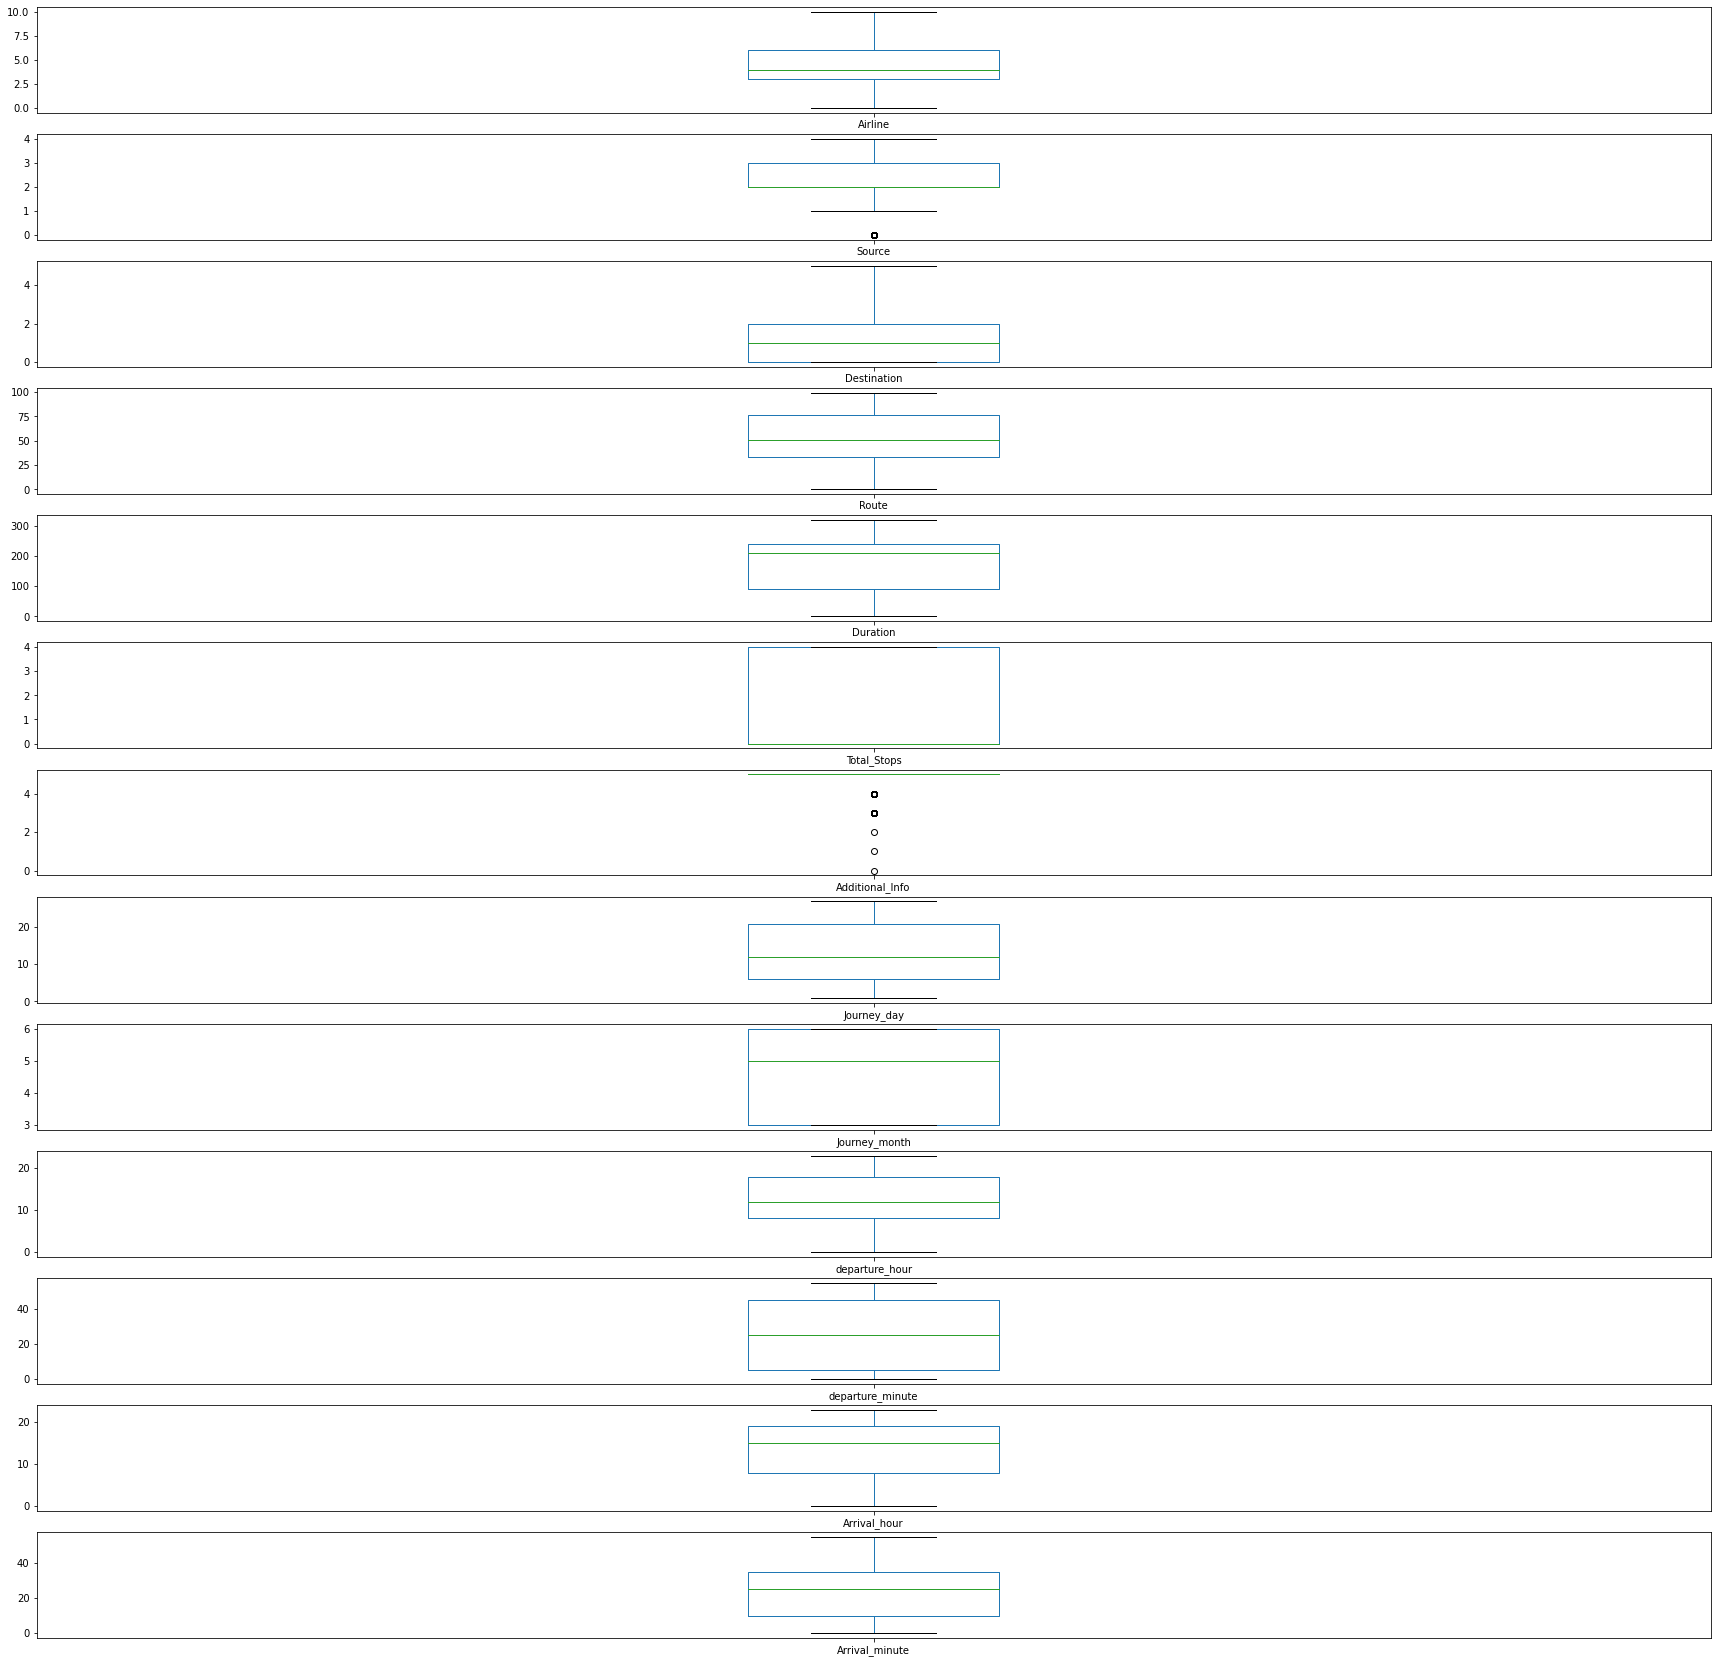

In [90]:
df_test.plot(kind='box',subplots=True,layout=(13,1),figsize=(30,30))

source and additional info have outliers

In [91]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_test))
threshold=3
np.where(z>3)

(array([ 954, 1802, 1861], dtype=int64), array([6, 6, 6], dtype=int64))

In [92]:
df_new_test=df_test[(z<3).all(axis=1)]
df_new_test.head()
df_new_test.shape

(2668, 13)

In [93]:
df_test.shape

(2671, 13)

In [94]:
((2671-2668)/2671)*100

0.11231748408835641

as the dataloss is less than 5% we can remove the outliers

In [98]:
import joblib
flight_joblib=joblib.load('flightpricemodel.pkl')

pred_test=flight_joblib.predict(x)


loading the file

In [102]:
pred_test[0]

6483.646998361989

In [100]:
pred_test[2670]

6667.5206679079365

In [103]:
pred_test=pd.DataFrame(pred_test)
pred_test.to_csv('prediction_flightprice_test.csv')